<a href="https://colab.research.google.com/github/yolandaazzahra/EndTermTask/blob/main/EndTermTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Yolanda Azzahra

NPM : 2306319514


Chapter 11 : GAN

11.2

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
from PIL import Image
import os

# Load MNIST dataset and normalize pixel values to [0, 1]
def load_mnist_data(data_dir="data"):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    train_dataset = datasets.MNIST(root=data_dir, train=True, download=True, transform=transform)
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
    return train_loader

# Build the generator network
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 28 * 28),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

# Build the critic/discriminator network
class Critic(nn.Module):
    def __init__(self):
        super(Critic, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
        )

    def forward(self, x):
        return self.model(x)

# Train Minimax GAN
def train_minimax_gan(train_loader, epochs, batch_size, latent_dim, learning_rate, device):
    generator = Generator(latent_dim).to(device)
    critic = Critic().to(device)

    opt_gen = optim.Adam(generator.parameters(), lr=learning_rate)
    opt_critic = optim.Adam(critic.parameters(), lr=learning_rate)

    for epoch in range(1, epochs + 1):
        for batch_idx, (real_images, _) in enumerate(train_loader):
            # Pastikan batch memiliki ukuran yang sesuai
            current_batch_size = real_images.size(0)  # Ambil ukuran aktual dari batch saat ini
            real_images = real_images.view(current_batch_size, -1).to(device)

            # Train the critic
            noise = torch.randn(current_batch_size, latent_dim).to(device)  # Gunakan ukuran batch yang sesuai
            fake_images = generator(noise).detach()
            real_score = torch.sigmoid(critic(real_images))
            fake_score = torch.sigmoid(critic(fake_images))
            critic_loss = -torch.mean(torch.log(real_score + 1e-8) + torch.log(1 - fake_score + 1e-8))

            opt_critic.zero_grad()
            critic_loss.backward()
            opt_critic.step()

            # Train the generator
            noise = torch.randn(current_batch_size, latent_dim).to(device)  # Gunakan ukuran batch yang sesuai
            fake_images = generator(noise)
            fake_score = torch.sigmoid(critic(fake_images))
            generator_loss = -torch.mean(torch.log(fake_score + 1e-8))

            opt_gen.zero_grad()
            generator_loss.backward()
            opt_gen.step()

            if batch_idx % 100 == 0:
                print(
                    f"Epoch [{epoch}/{epochs}], Batch [{batch_idx}/{len(train_loader)}], "
                    f"Critic Loss: {critic_loss.item():.4f}, Generator Loss: {generator_loss.item():.4f}"
                )


# Generate and save images
def generate_and_save_images(generator, epoch, device, output_dir="output"):
    os.makedirs(output_dir, exist_ok=True)
    generator.eval()
    noise = torch.randn(64, 100).to(device)
    fake_images = generator(noise).view(-1, 28, 28).cpu().detach().numpy()
    fake_images = (fake_images + 1) / 2.0 * 255.0  # Rescale to [0, 255]

    for i, img in enumerate(fake_images):
        img = Image.fromarray(img.astype(np.uint8), mode='L')
        img.save(os.path.join(output_dir, f"epoch{epoch}_img{i}.png"))

# Main function
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    train_loader = load_mnist_data()
    epochs = 5
    batch_size = 64
    latent_dim = 100
    learning_rate = 0.00005

    train_minimax_gan(train_loader, epochs, batch_size, latent_dim, learning_rate, device)


Using device: cuda
Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.2MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 493kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.47MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 10.0MB/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Epoch [1/5], Batch [0/938], Critic Loss: 1.4276, Generator Loss: 0.6950
Epoch [1/5], Batch [100/938], Critic Loss: 1.3980, Generator Loss: 0.5792
Epoch [1/5], Batch [200/938], Critic Loss: 0.7749, Generator Loss: 0.9953
Epoch [1/5], Batch [300/938], Critic Loss: 0.3529, Generator Loss: 1.7672
Epoch [1/5], Batch [400/938], Critic Loss: 0.7642, Generator Loss: 1.0124
Epoch [1/5], Batch [500/938], Critic Loss: 0.8313, Generator Loss: 1.1024
Epoch [1/5], Batch [600/938], Critic Loss: 1.0143, Generator Loss: 0.9892
Epoch [1/5], Batch [700/938], Critic Loss: 0.7459, Generator Loss: 1.3113
Epoch [1/5], Batch [800/938], Critic Loss: 0.6891, Generator Loss: 1.4761
Epoch [1/5], Batch [900/938], Critic Loss: 0.6674, Generator Loss: 1.4291
Epoch [2/5], Batch [0/938], Critic Loss: 1.1677, Generator Loss: 0.9664
Epoch [2/5], Batch [100/938], Critic Loss: 0.7216, Generator Loss: 1.3709
Epoch [2/5], Batch [200/938], Critic Loss: 0.

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import save_image


# Generator Network
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 28 * 28),
            nn.Tanh(),
        )

    def forward(self, z):
        return self.model(z)


# Critic Network
class Critic(nn.Module):
    def __init__(self):
        super(Critic, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
        )

    def forward(self, x):
        return self.model(x)


# Function to train WGAN
def train_wgan(
    train_loader, epochs, batch_size, latent_dim, learning_rate, critic_iterations, clipping_value, device
):
    generator = Generator(latent_dim).to(device)
    critic = Critic().to(device)

    opt_gen = optim.RMSprop(generator.parameters(), lr=learning_rate)
    opt_critic = optim.RMSprop(critic.parameters(), lr=learning_rate)

    for epoch in range(1, epochs + 1):
        for batch_idx, (real_images, _) in enumerate(train_loader):
            real_images = real_images.view(-1, 28 * 28).to(device)
            current_batch_size = real_images.size(0)

            # Train the critic
            for _ in range(critic_iterations):
                noise = torch.randn(current_batch_size, latent_dim).to(device)
                fake_images = generator(noise).detach()

                real_score = critic(real_images)
                fake_score = critic(fake_images)

                critic_loss = fake_score.mean() - real_score.mean()

                opt_critic.zero_grad()
                critic_loss.backward()
                opt_critic.step()

                # Weight clipping
                for p in critic.parameters():
                    p.data.clamp_(-clipping_value, clipping_value)

            # Train the generator
            noise = torch.randn(current_batch_size, latent_dim).to(device)
            fake_images = generator(noise)
            fake_score = critic(fake_images)

            generator_loss = -fake_score.mean()

            opt_gen.zero_grad()
            generator_loss.backward()
            opt_gen.step()

            # Logging
            if batch_idx % 100 == 0:
                print(
                    f"Epoch [{epoch}/{epochs}], Batch [{batch_idx}/{len(train_loader)}], "
                    f"Critic Loss: {critic_loss.item():.4f}, Generator Loss: {generator_loss.item():.4f}"
                )

        # Save generated images at the end of each epoch
        output_dir = "output_wgan"
        os.makedirs(output_dir, exist_ok=True)
        generate_and_save_images(generator, latent_dim, epoch, device, output_dir)


# Function to generate and save images
def generate_and_save_images(generator, latent_dim, epoch, device, output_dir):
    noise = torch.randn(64, latent_dim).to(device)
    fake_images = generator(noise).view(-1, 1, 28, 28).cpu()
    fake_images = (fake_images + 1) / 2.0  # Rescale images to [0, 1]
    save_image(fake_images, os.path.join(output_dir, f"epoch_{epoch}.png"), nrow=8)


# Main function
def main():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Load MNIST dataset
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    mnist = datasets.MNIST(root="data", train=True, transform=transform, download=True)
    train_loader = torch.utils.data.DataLoader(mnist, batch_size=64, shuffle=True)

    # Training parameters
    epochs = 5
    batch_size = 64
    latent_dim = 100
    learning_rate = 0.00005
    critic_iterations = 5
    clipping_value = 0.01

    # Train WGAN
    print("Training WGAN...")
    train_wgan(train_loader, epochs, batch_size, latent_dim, learning_rate, critic_iterations, clipping_value, device)


if __name__ == "__main__":
    main()


Using device: cuda
Training WGAN...
Epoch [1/5], Batch [0/938], Critic Loss: -0.1005, Generator Loss: 0.0064
Epoch [1/5], Batch [100/938], Critic Loss: -0.0959, Generator Loss: -2.0477
Epoch [1/5], Batch [200/938], Critic Loss: -0.1890, Generator Loss: -0.2643
Epoch [1/5], Batch [300/938], Critic Loss: -0.3985, Generator Loss: -1.7027
Epoch [1/5], Batch [400/938], Critic Loss: -0.4744, Generator Loss: -2.2196
Epoch [1/5], Batch [500/938], Critic Loss: -0.4205, Generator Loss: -2.2928
Epoch [1/5], Batch [600/938], Critic Loss: -0.3910, Generator Loss: -2.4727
Epoch [1/5], Batch [700/938], Critic Loss: -0.5246, Generator Loss: -1.9415
Epoch [1/5], Batch [800/938], Critic Loss: -0.4729, Generator Loss: -1.5136
Epoch [1/5], Batch [900/938], Critic Loss: -0.4249, Generator Loss: -1.2204
Epoch [2/5], Batch [0/938], Critic Loss: -0.5361, Generator Loss: -1.3954
Epoch [2/5], Batch [100/938], Critic Loss: -0.5058, Generator Loss: -1.1842
Epoch [2/5], Batch [200/938], Critic Loss: -0.3254, Gener

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
from google.colab import files

# Konstanta
IMG_SIZE = 64
LATENT_DIM = 128
BATCH_SIZE = 32
LEARNING_RATE = 1e-4
BATCHES = 10000

# Dataset Custom untuk Memuat Gambar
class UploadedImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image

# Fungsi untuk Memuat Data dari Gambar yang Diunggah
def load_uploaded_images(uploaded_files, img_size=64, batch_size=32):
    image_paths = []
    for filename in uploaded_files.keys():
        image_paths.append(filename)

    transform = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
    ])

    dataset = UploadedImageDataset(image_paths, transform=transform)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return dataloader

# Model Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(LATENT_DIM, 1024, 4, 1, 0, bias=False),
            nn.BatchNorm2d(1024),
            nn.ReLU(True),
            nn.ConvTranspose2d(1024, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

# Model Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 128, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1024, 4, 2, 1, bias=False),
            nn.BatchNorm2d(1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(1024, 1, 4, 1, 0, bias=False)
        )

    def forward(self, x):
        return self.model(x)

# Fungsi Pelatihan
def train_gan(generator, discriminator, dataloader, device):
    opt_g = torch.optim.Adam(generator.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999))
    opt_d = torch.optim.Adam(discriminator.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999))
    criterion = nn.MSELoss()
    fixed_noise = torch.randn(BATCH_SIZE, LATENT_DIM, 1, 1, device=device)

    for epoch in range(BATCHES):
        for real_images in dataloader:
            real_images = real_images.to(device)

            # Pelatihan Discriminator
            discriminator.zero_grad()
            real_labels = torch.ones(real_images.size(0), 1, device=device)
            fake_labels = torch.zeros(real_images.size(0), 1, device=device)
            real_output = discriminator(real_images).view(-1)
            d_loss_real = criterion(real_output, real_labels)

            noise = torch.randn(real_images.size(0), LATENT_DIM, 1, 1, device=device)
            fake_images = generator(noise)
            fake_output = discriminator(fake_images.detach()).view(-1)
            d_loss_fake = criterion(fake_output, fake_labels)

            d_loss = d_loss_real + d_loss_fake
            d_loss.backward()
            opt_d.step()

            # Pelatihan Generator
            generator.zero_grad()
            fake_output = discriminator(fake_images).view(-1)
            g_loss = criterion(fake_output, real_labels)
            g_loss.backward()
            opt_g.step()

        if epoch % 100 == 0:
            print(f"Epoch [{epoch}/{BATCHES}]  Loss D: {d_loss.item()}, Loss G: {g_loss.item()}")

# Main Program
if __name__ == "__main__":
    # Upload gambar menggunakan Google Colab
    uploaded = files.upload()

    # Load gambar dari upload
    dataloader = load_uploaded_images(uploaded, img_size=IMG_SIZE, batch_size=BATCH_SIZE)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Inisialisasi Model
    generator = Generator().to(device)
    discriminator = Discriminator().to(device)

    # Latih GAN
    train_gan(generator, discriminator, dataloader, device)


Saving person1_virus_6.jpeg to person1_virus_6.jpeg


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [0/10000]  Loss D: 0.25707942247390747, Loss G: 304.6692199707031
Epoch [100/10000]  Loss D: 0.5128493905067444, Loss G: 4.641046524047852
Epoch [200/10000]  Loss D: 0.09020882099866867, Loss G: 0.6867765784263611
Epoch [300/10000]  Loss D: 0.8848155736923218, Loss G: 0.11726993322372437
Epoch [400/10000]  Loss D: 0.4400639235973358, Loss G: 3.4583518505096436
Epoch [500/10000]  Loss D: 0.011034689843654633, Loss G: 1.5810446739196777
Epoch [600/10000]  Loss D: 0.8594956398010254, Loss G: 6.331902503967285
Epoch [700/10000]  Loss D: 0.04018475487828255, Loss G: 1.5776571035385132
Epoch [800/10000]  Loss D: 0.4033131003379822, Loss G: 0.31742456555366516
Epoch [900/10000]  Loss D: 0.05708761513233185, Loss G: 0.452210009098053
Epoch [1000/10000]  Loss D: 0.05089739337563515, Loss G: 1.3969789743423462
Epoch [1100/10000]  Loss D: 0.024989277124404907, Loss G: 1.2501888275146484
Epoch [1200/10000]  Loss D: 0.0311281718313694, Loss G: 0.7172957062721252
Epoch [1300/10000]  Loss D: 0.

11.3 WGAN with Weight Clipping and Gradient Penalty

In [ ]:
pip install torch torchvision matplotlib Pillow numpy


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

# Hyperparameters
LATENT_DIM = 100
BATCH_SIZE = 64
EPOCHS = 5
LEARNING_RATE = 0.00005
CLIPPING_VALUE = 0.01
CRITIC_ITERATIONS = 5
IMAGE_SIZE = 28 * 28

# Device configuration (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Generator model
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(latent_dim, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 1024)
        self.fc4 = nn.Linear(1024, IMAGE_SIZE)

    def forward(self, z):
        x = torch.relu(self.fc1(z))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return torch.tanh(self.fc4(x)).view(-1, 1, 28, 28)  # Reshape to 28x28 image

# Critic (Discriminator) model
class Critic(nn.Module):
    def __init__(self):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(IMAGE_SIZE, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 1)
        self.lrelu = nn.LeakyReLU(0.2)  # Define LeakyReLU as a layer

    def forward(self, x):
        x = self.lrelu(self.fc1(x))  # Use LeakyReLU layer
        x = self.lrelu(self.fc2(x))  # Use LeakyReLU layer
        return self.fc3(x)


# WGAN with weight clipping
def train_wgan_weight_clipping(train_loader, generator, critic, epochs, critic_iterations, device):
    opt_gen = optim.Adam(generator.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999))
    opt_critic = optim.Adam(critic.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999))

    for epoch in range(EPOCHS):
        for i, (real_images, _) in enumerate(train_loader):
            real_images = real_images.view(-1, IMAGE_SIZE).to(device)

            # Train Critic
            for _ in range(CRITIC_ITERATIONS):
                # Generate fake images
                noise = torch.randn(BATCH_SIZE, LATENT_DIM).to(device)
                fake_images = generator(noise).view(BATCH_SIZE, -1)

                # Critic loss
                real_score = critic(real_images)
                fake_score = critic(fake_images)
                critic_loss = fake_score.mean() - real_score.mean()

                opt_critic.zero_grad()
                critic_loss.backward()
                opt_critic.step()

                # Clip weights
                for p in critic.parameters():
                    p.data.clamp_(-CLIPPING_VALUE, CLIPPING_VALUE)

            # Train Generator
            noise = torch.randn(BATCH_SIZE, LATENT_DIM).to(device)
            fake_images = generator(noise).view(BATCH_SIZE, -1)
            fake_score = critic(fake_images)

            generator_loss = -fake_score.mean()

            opt_gen.zero_grad()
            generator_loss.backward()
            opt_gen.step()

            if i % 100 == 0:
                print(f'Epoch [{epoch}/{EPOCHS}], Batch [{i}/{len(train_loader)}]')

        # Save generated images after each epoch
        save_generated_images(generator, epoch)

# WGAN with gradient penalty
def train_wgan_gradient_penalty(train_loader, generator, critic, epochs, critic_iterations, device, lambda_gp=10.0):
    opt_gen = optim.Adam(generator.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999))
    opt_critic = optim.Adam(critic.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999))

    for epoch in range(EPOCHS):
        for i, (real_images, _) in enumerate(train_loader):
            real_images = real_images.view(-1, IMAGE_SIZE).to(device)

            # Train Critic
            for _ in range(CRITIC_ITERATIONS):
                # Generate fake images
                noise = torch.randn(BATCH_SIZE, LATENT_DIM).to(device)
                fake_images = generator(noise).view(BATCH_SIZE, -1)

                # Critic loss
                real_score = critic(real_images)
                fake_score = critic(fake_images)

                # Compute gradient penalty
                epsilon = torch.rand(BATCH_SIZE, 1).to(device)
                interpolated_images = epsilon * real_images + (1 - epsilon) * fake_images
                interpolated_images.requires_grad_(True)

                interpolated_score = critic(interpolated_images)
                gradients = torch.autograd.grad(outputs=interpolated_score, inputs=interpolated_images,
                                                grad_outputs=torch.ones_like(interpolated_score), create_graph=True)[0]
                gradients = gradients.view(BATCH_SIZE, -1)
                gradient_norm = gradients.norm(2, dim=1)
                gradient_penalty = ((gradient_norm - 1) ** 2).mean()

                critic_loss = fake_score.mean() - real_score.mean() + lambda_gp * gradient_penalty

                opt_critic.zero_grad()
                critic_loss.backward()
                opt_critic.step()

            # Train Generator
            noise = torch.randn(BATCH_SIZE, LATENT_DIM).to(device)
            fake_images = generator(noise).view(BATCH_SIZE, -1)
            fake_score = critic(fake_images)

            generator_loss = -fake_score.mean()

            opt_gen.zero_grad()
            generator_loss.backward()
            opt_gen.step()

            if i % 100 == 0:
                print(f'Epoch [{epoch}/{EPOCHS}], Batch [{i}/{len(train_loader)}]')

        # Save generated images after each epoch
        save_generated_images(generator, epoch)

# Helper function to save generated images
def save_generated_images(generator, epoch):
    noise = torch.randn(64, LATENT_DIM).to(device)
    fake_images = generator(noise).view(64, 1, 28, 28).cpu().detach()

    # Save images
    output_dir = "output_wgan"
    os.makedirs(output_dir, exist_ok=True)
    for i in range(64):
        img = fake_images[i].squeeze().numpy()
        img = (img * 255.0).astype(np.uint8)
        img = Image.fromarray(img)
        img.save(f"{output_dir}/epoch{epoch}_img{i}.png")

# Main program
if __name__ == '__main__':
    # Load MNIST dataset
    transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
    dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    train_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

    # Initialize models
    generator = Generator(LATENT_DIM).to(device)
    critic = Critic().to(device)

    # Train WGAN with weight clipping
    print("Training WGAN with Weight Clipping...")
    train_wgan_weight_clipping(train_loader, generator, critic, EPOCHS, CRITIC_ITERATIONS, device)

    # Train WGAN with gradient penalty
    print("Training WGAN with Gradient Penalty...")
    train_wgan_gradient_penalty(train_loader, generator, critic, EPOCHS, CRITIC_ITERATIONS, device)


Training WGAN with Weight Clipping...
Epoch [0/5], Batch [0/938]
Epoch [0/5], Batch [100/938]
Epoch [0/5], Batch [200/938]
Epoch [0/5], Batch [300/938]
Epoch [0/5], Batch [400/938]
Epoch [0/5], Batch [500/938]
Epoch [0/5], Batch [600/938]
Epoch [0/5], Batch [700/938]
Epoch [0/5], Batch [800/938]
Epoch [0/5], Batch [900/938]
Epoch [1/5], Batch [0/938]
Epoch [1/5], Batch [100/938]
Epoch [1/5], Batch [200/938]
Epoch [1/5], Batch [300/938]
Epoch [1/5], Batch [400/938]
Epoch [1/5], Batch [500/938]
Epoch [1/5], Batch [600/938]
Epoch [1/5], Batch [700/938]
Epoch [1/5], Batch [800/938]
Epoch [1/5], Batch [900/938]
Epoch [2/5], Batch [0/938]
Epoch [2/5], Batch [100/938]
Epoch [2/5], Batch [200/938]
Epoch [2/5], Batch [300/938]
Epoch [2/5], Batch [400/938]
Epoch [2/5], Batch [500/938]
Epoch [2/5], Batch [600/938]
Epoch [2/5], Batch [700/938]
Epoch [2/5], Batch [800/938]
Epoch [2/5], Batch [900/938]
Epoch [3/5], Batch [0/938]
Epoch [3/5], Batch [100/938]
Epoch [3/5], Batch [200/938]
Epoch [3/5], 

RuntimeError: The size of tensor a (64) must match the size of tensor b (32) at non-singleton dimension 0

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import os
from PIL import Image

# Hyperparameters
LATENT_DIM = 100
BATCH_SIZE = 64
EPOCHS = 5
LEARNING_RATE = 0.00005
CLIPPING_VALUE = 0.01
CRITIC_ITERATIONS = 5
IMAGE_SIZE = 28 * 28

# Device configuration (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Generator model
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(latent_dim, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 1024)
        self.fc4 = nn.Linear(1024, IMAGE_SIZE)

    def forward(self, z):
        x = torch.relu(self.fc1(z))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return torch.tanh(self.fc4(x)).view(-1, 1, 28, 28)  # Reshape to 28x28 image

# Critic (Discriminator) model
class Critic(nn.Module):
    def __init__(self):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(IMAGE_SIZE, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 1)
        self.lrelu = nn.LeakyReLU(0.2)  # Define LeakyReLU as a layer

    def forward(self, x):
        x = self.lrelu(self.fc1(x))  # Use LeakyReLU layer
        x = self.lrelu(self.fc2(x))  # Use LeakyReLU layer
        return self.fc3(x)


# WGAN with weight clipping
def train_wgan_weight_clipping(train_loader, generator, critic, epochs, critic_iterations, device):
    opt_gen = optim.Adam(generator.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999))
    opt_critic = optim.Adam(critic.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999))

    for epoch in range(EPOCHS):
        for i, (real_images, _) in enumerate(train_loader):
            real_images = real_images.view(-1, IMAGE_SIZE).to(device)

            # Train Critic
            for _ in range(CRITIC_ITERATIONS):
                # Generate fake images
                noise = torch.randn(BATCH_SIZE, LATENT_DIM).to(device)
                fake_images = generator(noise).view(BATCH_SIZE, -1)

                # Critic loss
                real_score = critic(real_images)
                fake_score = critic(fake_images)
                critic_loss = fake_score.mean() - real_score.mean()

                opt_critic.zero_grad()
                critic_loss.backward()
                opt_critic.step()

                # Clip weights
                for p in critic.parameters():
                    p.data.clamp_(-CLIPPING_VALUE, CLIPPING_VALUE)

            # Train Generator
            noise = torch.randn(BATCH_SIZE, LATENT_DIM).to(device)
            fake_images = generator(noise).view(BATCH_SIZE, -1)
            fake_score = critic(fake_images)

            generator_loss = -fake_score.mean()

            opt_gen.zero_grad()
            generator_loss.backward()
            opt_gen.step()

            if i % 100 == 0:
                print(f'Epoch [{epoch}/{EPOCHS}], Batch [{i}/{len(train_loader)}]')

        # Save generated images after each epoch
        save_generated_images(generator, epoch)

# WGAN with gradient penalty
def train_wgan_gradient_penalty(train_loader, generator, critic, epochs, critic_iterations, device, lambda_gp=10.0):
    opt_gen = optim.Adam(generator.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999))
    opt_critic = optim.Adam(critic.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999))

    for epoch in range(EPOCHS):
        for i, (real_images, _) in enumerate(train_loader):
            real_images = real_images.view(-1, IMAGE_SIZE).to(device)

            # Train Critic
            for _ in range(CRITIC_ITERATIONS):
                # Generate fake images
                noise = torch.randn(real_images.size(0), LATENT_DIM).to(device)  # Match batch size of real_images
                fake_images = generator(noise).view(real_images.size(0), -1)

                # Critic loss
                real_score = critic(real_images)
                fake_score = critic(fake_images)

                # Compute gradient penalty
                epsilon = torch.rand(real_images.size(0), 1).to(device)  # Use the same batch size for epsilon
                interpolated_images = epsilon * real_images + (1 - epsilon) * fake_images
                interpolated_images.requires_grad_(True)

                interpolated_score = critic(interpolated_images)
                gradients = torch.autograd.grad(outputs=interpolated_score, inputs=interpolated_images,
                                                grad_outputs=torch.ones_like(interpolated_score), create_graph=True)[0]
                gradients = gradients.view(real_images.size(0), -1)
                gradient_norm = gradients.norm(2, dim=1)
                gradient_penalty = ((gradient_norm - 1) ** 2).mean()

                critic_loss = fake_score.mean() - real_score.mean() + lambda_gp * gradient_penalty

                opt_critic.zero_grad()
                critic_loss.backward()
                opt_critic.step()

            # Train Generator
            noise = torch.randn(real_images.size(0), LATENT_DIM).to(device)  # Match batch size of real_images
            fake_images = generator(noise).view(real_images.size(0), -1)
            fake_score = critic(fake_images)

            generator_loss = -fake_score.mean()

            opt_gen.zero_grad()
            generator_loss.backward()
            opt_gen.step()

            if i % 100 == 0:
                print(f'Epoch [{epoch}/{EPOCHS}], Batch [{i}/{len(train_loader)}]')

        # Save generated images after each epoch
        save_generated_images(generator, epoch)


# Helper function to save generated images
def save_generated_images(generator, epoch):
    noise = torch.randn(64, LATENT_DIM).to(device)
    fake_images = generator(noise).view(64, 1, 28, 28).cpu().detach()

    # Save images
    output_dir = "output_wgan"
    os.makedirs(output_dir, exist_ok=True)
    for i in range(64):
        img = fake_images[i].squeeze().numpy()
        img = (img * 255.0).astype(np.uint8)
        img = Image.fromarray(img)
        img.save(f"{output_dir}/epoch{epoch}_img{i}.png")

# Main program
if __name__ == '__main__':
    # Load MNIST dataset
    transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
    dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    train_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

    # Initialize models
    generator = Generator(LATENT_DIM).to(device)
    critic = Critic().to(device)

    # Train WGAN with weight clipping
    print("Training WGAN with Weight Clipping...")
    train_wgan_weight_clipping(train_loader, generator, critic, EPOCHS, CRITIC_ITERATIONS, device)

    # Train WGAN with gradient penalty
    print("Training WGAN with Gradient Penalty...")
    train_wgan_gradient_penalty(train_loader, generator, critic, EPOCHS, CRITIC_ITERATIONS, device)


Training WGAN with Weight Clipping...
Epoch [0/5], Batch [0/938]
Epoch [0/5], Batch [100/938]
Epoch [0/5], Batch [200/938]
Epoch [0/5], Batch [300/938]
Epoch [0/5], Batch [400/938]
Epoch [0/5], Batch [500/938]
Epoch [0/5], Batch [600/938]
Epoch [0/5], Batch [700/938]
Epoch [0/5], Batch [800/938]
Epoch [0/5], Batch [900/938]
Epoch [1/5], Batch [0/938]
Epoch [1/5], Batch [100/938]
Epoch [1/5], Batch [200/938]
Epoch [1/5], Batch [300/938]
Epoch [1/5], Batch [400/938]
Epoch [1/5], Batch [500/938]
Epoch [1/5], Batch [600/938]
Epoch [1/5], Batch [700/938]
Epoch [1/5], Batch [800/938]
Epoch [1/5], Batch [900/938]
Epoch [2/5], Batch [0/938]
Epoch [2/5], Batch [100/938]
Epoch [2/5], Batch [200/938]
Epoch [2/5], Batch [300/938]
Epoch [2/5], Batch [400/938]
Epoch [2/5], Batch [500/938]
Epoch [2/5], Batch [600/938]
Epoch [2/5], Batch [700/938]
Epoch [2/5], Batch [800/938]
Epoch [2/5], Batch [900/938]
Epoch [3/5], Batch [0/938]
Epoch [3/5], Batch [100/938]
Epoch [3/5], Batch [200/938]
Epoch [3/5], 

11.4

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import pandas as pd
from google.colab import files

# Upload files
uploaded = files.upload()

# Custom dataset for the uploaded images
class CustomImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB")
        if self.transform:
            return self.transform(image)
        return image

# Generator network
class Generator(nn.Module):
    def __init__(self, z_dim):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 3 * 64 * 64),
            nn.Tanh()
        )

    def forward(self, z):
        return self.net(z).view(-1, 3, 64, 64)

# Discriminator network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(3 * 64 * 64, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x.view(-1, 3 * 64 * 64))

# Hyperparameters
z_dim = 100
lr = 0.0002
batch_size = 1
epochs = 100

# Transformations and dataset
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5] * 3, [0.5] * 3)
])
image_paths = list(uploaded.keys())
dataset = CustomImageDataset(image_paths, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Initialize models
generator = Generator(z_dim)
discriminator = Discriminator()

# Loss and optimizers
criterion = nn.BCELoss()
g_optim = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
d_optim = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# Training loop
for epoch in range(epochs):
    for real_images in dataloader:
        # Train Discriminator
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Real images
        outputs = discriminator(real_images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs

        # Fake images
        z = torch.randn(batch_size, z_dim)
        fake_images = generator(z)
        outputs = discriminator(fake_images.detach())
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs

        # Backprop and optimize
        d_loss = d_loss_real + d_loss_fake
        d_optim.zero_grad()
        d_loss.backward()
        d_optim.step()

        # Train Generator
        z = torch.randn(batch_size, z_dim)
        fake_images = generator(z)
        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)

        g_optim.zero_grad()
        g_loss.backward()
        g_optim.step()

    print(f"Epoch [{epoch+1}/{epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}")

# Save generated image
z = torch.randn(1, z_dim)
generated_image = generator(z).detach().squeeze()
generated_image = (generated_image + 1) / 2  # Denormalize
generated_image = transforms.ToPILImage()(generated_image)
generated_image.save('generated_image.jpg')


Saving file.jpg to file.jpg
Epoch [1/100], d_loss: 1.3718, g_loss: 0.7066
Epoch [2/100], d_loss: 0.8613, g_loss: 0.6973
Epoch [3/100], d_loss: 0.7221, g_loss: 0.6917
Epoch [4/100], d_loss: 0.7353, g_loss: 0.6767
Epoch [5/100], d_loss: 0.7573, g_loss: 0.6715
Epoch [6/100], d_loss: 0.7782, g_loss: 0.6957
Epoch [7/100], d_loss: 0.7628, g_loss: 0.7463
Epoch [8/100], d_loss: 0.7124, g_loss: 0.7806
Epoch [9/100], d_loss: 0.6929, g_loss: 0.7746
Epoch [10/100], d_loss: 0.7099, g_loss: 0.8039
Epoch [11/100], d_loss: 0.7858, g_loss: 0.6835
Epoch [12/100], d_loss: 0.9849, g_loss: 0.7220
Epoch [13/100], d_loss: 0.8941, g_loss: 0.5623
Epoch [14/100], d_loss: 1.1052, g_loss: 0.6208
Epoch [15/100], d_loss: 0.9371, g_loss: 0.6492
Epoch [16/100], d_loss: 1.0009, g_loss: 0.6734
Epoch [17/100], d_loss: 0.8882, g_loss: 0.7538
Epoch [18/100], d_loss: 0.7855, g_loss: 0.8192
Epoch [19/100], d_loss: 0.7562, g_loss: 0.9751
Epoch [20/100], d_loss: 0.7755, g_loss: 0.7074
Epoch [21/100], d_loss: 1.1131, g_loss: 0

Saving file.jpg to file (1).jpg
Epoch [1/200], d_loss: 1.3987, g_loss: 0.7079
Epoch [2/200], d_loss: 0.9531, g_loss: 0.6972
Epoch [3/200], d_loss: 0.7341, g_loss: 0.6911
Epoch [4/200], d_loss: 0.7401, g_loss: 0.6658
Epoch [5/200], d_loss: 0.7529, g_loss: 0.6610
Epoch [6/200], d_loss: 0.7840, g_loss: 0.6729
Epoch [7/200], d_loss: 0.7654, g_loss: 0.6688
Epoch [8/200], d_loss: 0.7578, g_loss: 0.7280
Epoch [9/200], d_loss: 0.7406, g_loss: 0.7377
Epoch [10/200], d_loss: 0.7483, g_loss: 0.7693
Epoch [11/200], d_loss: 0.7613, g_loss: 0.6995
Epoch [12/200], d_loss: 0.8699, g_loss: 0.7967
Epoch [13/200], d_loss: 1.1402, g_loss: 0.4134
Epoch [14/200], d_loss: 1.2651, g_loss: 0.3063
Epoch [15/200], d_loss: 1.5661, g_loss: 0.3729
Epoch [16/200], d_loss: 1.2376, g_loss: 0.5919
Epoch [17/200], d_loss: 1.0306, g_loss: 0.7081
Epoch [18/200], d_loss: 1.1045, g_loss: 0.6204
Epoch [19/200], d_loss: 0.9691, g_loss: 0.6380
Epoch [20/200], d_loss: 0.9365, g_loss: 0.7745
Epoch [21/200], d_loss: 0.8924, g_los

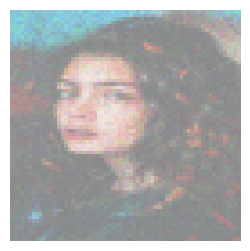

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

# Upload files
uploaded = files.upload()


# Custom dataset for the uploaded images
class CustomImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB")
        if self.transform:
            return self.transform(image)
        return image

# Function to display images
def show_images(images, nrows=1, ncols=1):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 3, nrows * 3))
    for i, img in enumerate(images):
        ax = axes[i] if nrows * ncols > 1 else axes
        ax.imshow(img.permute(1, 2, 0).numpy() * 0.5 + 0.5)
        ax.axis('off')
    plt.show()

# Generator network
class Generator(nn.Module):
    def __init__(self, z_dim):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 3 * 64 * 64),
            nn.Tanh()
        )

    def forward(self, z):
        return self.net(z).view(-1, 3, 64, 64)

# Discriminator network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(3 * 64 * 64, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x.view(-1, 3 * 64 * 64))

# Hyperparameters
z_dim = 100
lr = 0.0002
batch_size = 1
epochs = 200

# Transformations and dataset
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5] * 3, [0.5] * 3)
])
image_paths = list(uploaded.keys())
dataset = CustomImageDataset(image_paths, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Initialize models
generator = Generator(z_dim)
discriminator = Discriminator()

# Loss and optimizers
criterion = nn.BCELoss()
g_optim = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
d_optim = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# Training loop
for epoch in range(epochs):
    for real_images in dataloader:
        # Train Discriminator
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Real images
        outputs = discriminator(real_images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs

        # Fake images
        z = torch.randn(batch_size, z_dim)
        fake_images = generator(z)
        outputs = discriminator(fake_images.detach())
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs

        # Backprop and optimize
        d_loss = d_loss_real + d_loss_fake
        d_optim.zero_grad()
        d_loss.backward()
        d_optim.step()

        # Train Generator
        z = torch.randn(batch_size, z_dim)
        fake_images = generator(z)
        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)

        g_optim.zero_grad()
        g_loss.backward()
        g_optim.step()

    print(f"Epoch [{epoch+1}/{epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}")

# Save and show generated image
z = torch.randn(1, z_dim)
generated_image = generator(z).detach().squeeze()
generated_image = (generated_image + 1) / 2  # Denormalize
show_images([generated_image])
generated_image = transforms.ToPILImage()(generated_image)
generated_image.save('generated_image.jpg')
